In [1]:
symbol = "AMD"

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
stock = yf.Ticker(symbol)
stock = stock.history(period = "max")
stock.index = pd.to_datetime(stock.index)
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-11 00:00:00-04:00,167.550003,170.949997,166.550003,170.500000,48994500,0.0,0.0
2024-04-12 00:00:00-04:00,164.529999,165.699997,161.820007,163.279999,63334200,0.0,0.0
2024-04-15 00:00:00-04:00,164.429993,164.440002,158.759995,160.320007,61461200,0.0,0.0


<Axes: xlabel='Date'>

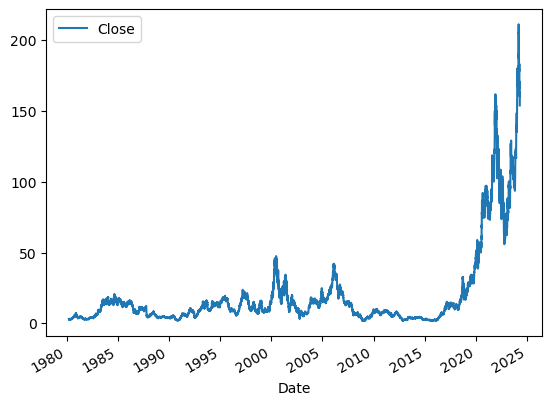

In [4]:
stock.plot.line(y="Close", use_index=True)

In [5]:
del stock['Dividends']
del stock['Stock Splits']
stock

,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800
...,...,...,...,...,...
2024-04-11 00:00:00-04:00,167.550003,170.949997,166.550003,170.500000,48994500
2024-04-12 00:00:00-04:00,164.529999,165.699997,161.820007,163.279999,63334200
2024-04-15 00:00:00-04:00,164.429993,164.440002,158.759995,160.320007,61461200


In [6]:
stock["Tomorrow"] = stock["Close"].shift(-1)
stock["Target"] = (stock["Tomorrow"] > stock["Close"]).astype(int)
stock = stock.loc["1990-01-01":].copy()
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,3.937500,4.125000,3.812500,4.125000,2544000,4.000000,0
1990-01-03 00:00:00-05:00,4.062500,4.125000,3.937500,4.000000,686800,3.937500,0
1990-01-04 00:00:00-05:00,4.000000,4.062500,3.875000,3.937500,944200,3.812500,0
1990-01-05 00:00:00-05:00,3.812500,3.812500,3.687500,3.812500,1511000,3.812500,0
1990-01-08 00:00:00-05:00,3.812500,3.812500,3.750000,3.812500,477000,3.875000,1
...,...,...,...,...,...,...,...
2024-04-11 00:00:00-04:00,167.550003,170.949997,166.550003,170.500000,48994500,163.279999,0
2024-04-12 00:00:00-04:00,164.529999,165.699997,161.820007,163.279999,63334200,160.320007,0
2024-04-15 00:00:00-04:00,164.429993,164.440002,158.759995,160.320007,61461200,163.460007,1


In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 200, device = 'gpu', random_state = 1)

train = stock.iloc[:-100]
test = stock.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [8]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

C:\Users\Nick Yeganeh\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:39:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


0.6

<Axes: xlabel='Date'>

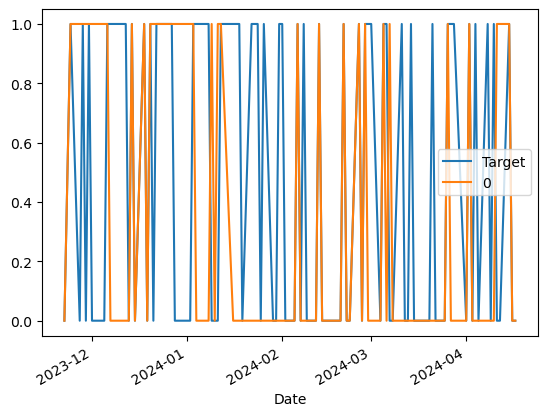

In [9]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [10]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = stock.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    stock[ratio_column] = stock["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    stock[trend_column] = stock.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [ ]:
stock = stock.dropna(subset=stock.columns[stock.columns != "Tomorrow"])
stock

In [ ]:
model = XGBClassifier(n_estimators = 1000, device = 'gpu', random_state = 1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.60] = 1
    preds[preds <.60] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(stock, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])